In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
# Create model directory
os.makedirs('models', exist_ok=True)

# Load the dataset
df = pd.read_csv(r"anemia.csv")

# Step 1: Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Step 2: Fill missing numeric values
num_cols = ['Hemoglobin', 'MCHC', 'MCV', 'MCH']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Step 3: Drop rows with missing Gender or Results
df = df.dropna(subset=['Gender', 'Result'])

# Step 4: Encode Gender
df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 5: Encode Results
df['Result'] = df['Result'].astype(str).str.strip().str.capitalize()
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])

# Save label encoder
joblib.dump(label_encoder, 'models/anemia_label_encoder.pkl')

# Step 6: Prepare features and target
X = df[['Gender', 'Hemoglobin', 'MCHC', 'MCV', 'MCH']]
y = df['Result']

# Final check: Drop any rows that still contain NaN values
X['Gender'] = X['Gender'].fillna(0)
X = X.fillna(X.mean())

# Recreate y to ensure it matches the new X
y = df.loc[X.index, 'Result']


# Step 7: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'models/anemia_scaler.pkl')

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

# Step 10: Train and evaluate
best_model = None
best_f1 = 0
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} → F1 Score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_model_name = name

# Step 11: Save the best model
joblib.dump(best_model, 'models/anemia_model.pkl')
print(f"\n✅ Best model: {best_model_name} (F1 Score: {best_f1:.4f}) saved as 'anemia_model.pkl'")


Logistic Regression → F1 Score: 0.9157
Decision Tree → F1 Score: 0.9921
Random Forest → F1 Score: 0.9921
Naive Bayes → F1 Score: 0.9206
SVM → F1 Score: 0.9127

✅ Best model: Decision Tree (F1 Score: 0.9921) saved as 'anemia_model.pkl'


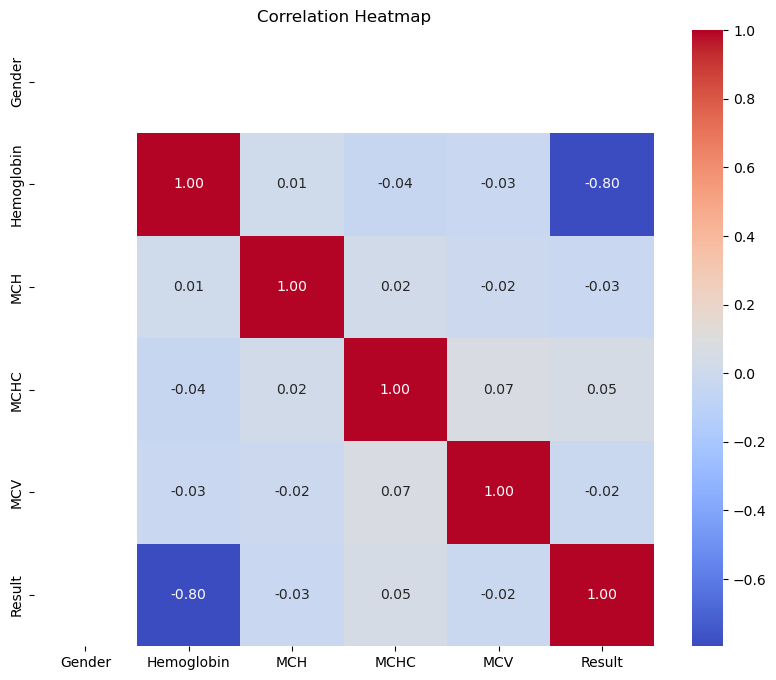

In [3]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()